<a href="https://colab.research.google.com/github/gtoubian/cce/blob/main/Module_One_Project_country_vaccinations_Gabriel_Toubian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## COVID-19 World Vaccination
Create a daily, weekly and monthly graph of vaccinations of COVID-19 worldwide and for 3 other countries. For the
chosen countries, give estimates of how long it would take to vaccinate the total population of the country given
the average daily, weekly monthly rates of vaccination. Plot the total number of vaccinations per country.

**Import CSV and import packages**

In [150]:
from google.colab import files
data = files.upload()

Saving covid.csv to covid (2).csv


In [151]:
import pandas as pd

import io
covidall = pd.read_csv(io.BytesIO(data['covid.csv']))

In [152]:
import numpy as np

In [153]:
import matplotlib.pyplot as plt

**Prep data: Choose relevant columns, create columns needed to draw conclusions for the 3 individual countries**

In [154]:
covidall['Month'] = pd.to_datetime(covidall['date']).dt.to_period('M')

In [155]:
covidall['Week'] = pd.to_datetime(covidall['date']).dt.to_period('W')

In [156]:
covidthree = covidall.loc[(covidall.country == 'Spain') | (covidall.country =='Canada') | (covidall.country =='France')]

In [157]:
covid3clear =  covidthree[['country', 'daily_vaccinations', 'date', 'Week', 'Month']].copy()

In [158]:
covid3clear = covid3clear.dropna(how='any')

In [159]:
import seaborn as sns


In [160]:
covid3clear['date'] = pd.to_datetime(covid3clear['date'])

**Create graphs for 3 individual countries: Canada, France, Spain**

Text(0.5, 1.0, 'Daily Vaccinations for 3 individual countries')

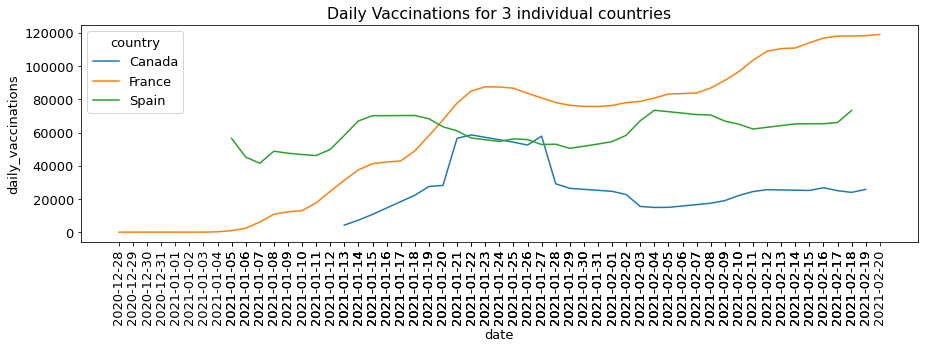

In [161]:
fig_dims = (15, 4)
fig, ax = plt.subplots(figsize=fig_dims)
plt.rcParams.update({'font.size': 13})
sns.lineplot(data=covid3clear, x="date", y='daily_vaccinations', hue = 'country')
ax.set(xticks=covid3clear.date.values)
plt.xticks(rotation=90)
plt.title('Daily Vaccinations for 3 individual countries')

In [162]:
covid3clear.loc[covid3clear['Week'] == '2020-12-28/2021-01-03', 'WeekName'] = 'Week 1'
covid3clear.loc[covid3clear['Week'] == '2021-01-04/2021-01-10', 'WeekName'] = 'Week 2'
covid3clear.loc[covid3clear['Week'] == '2021-01-11/2021-01-17', 'WeekName'] = 'Week 3'
covid3clear.loc[covid3clear['Week'] == '2021-01-18/2021-01-24', 'WeekName'] = 'Week 4'
covid3clear.loc[covid3clear['Week'] == '2021-01-25/2021-01-31', 'WeekName'] = 'Week 5'
covid3clear.loc[covid3clear['Week'] == '2021-02-01/2021-02-07', 'WeekName'] = 'Week 6'
covid3clear.loc[covid3clear['Week'] == '2021-02-08/2021-02-14', 'WeekName'] = 'Week 7'
covid3clear.loc[covid3clear['Week'] == '2021-02-15/2021-02-21', 'WeekName'] = 'Week 8'

In [163]:
covid3clear.sort_values(by=['WeekName'], inplace = True)

Text(0.5, 1.0, 'Average of Daily Vaccinations by week for 3 individual countries')

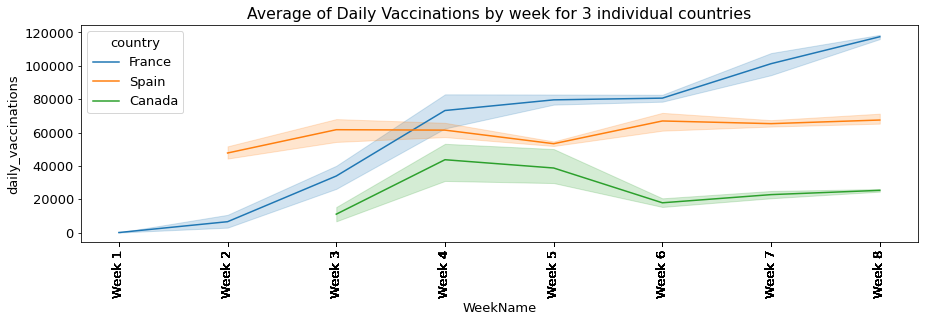

In [164]:
fig_dims = (15, 4)
fig, ax = plt.subplots(figsize=fig_dims)
plt.rcParams.update({'font.size': 13})
sns.lineplot(data=covid3clear, x="WeekName", y='daily_vaccinations', hue = 'country')
ax.set(xticks=covid3clear.WeekName.values)
plt.xticks(rotation=90)
plt.title('Average of Daily Vaccinations by week for 3 individual countries')

In [165]:
covid3clear.loc[covid3clear['Month'] == '2020-12', 'MonthName'] = 'Month 1'
covid3clear.loc[covid3clear['Month'] == '2021-01', 'MonthName'] = 'Month 2'
covid3clear.loc[covid3clear['Month'] == '2021-02', 'MonthName'] = 'Month 3'

In [166]:
covid3clear.sort_values(by=['Month'], inplace = True)

Text(0.5, 1.0, 'Average of Daily Vaccinations by Month for 3 individual countries')

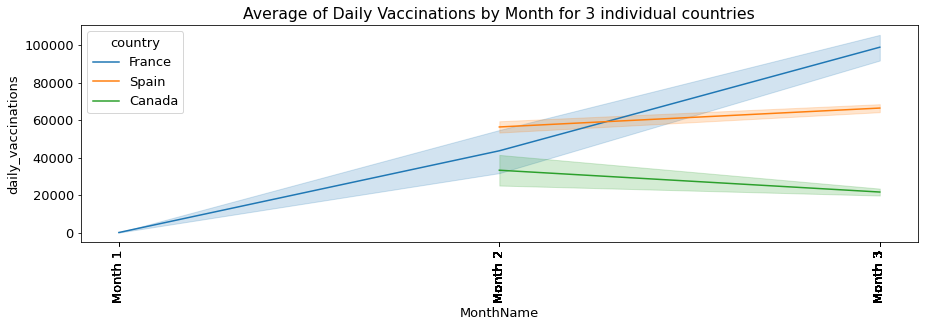

In [167]:
fig_dims = (15, 4)
fig, ax = plt.subplots(figsize=fig_dims)
plt.rcParams.update({'font.size': 13})
sns.lineplot(data=covid3clear, x="MonthName", y='daily_vaccinations', hue = 'country')
ax.set(xticks=covid3clear.MonthName.values)
plt.xticks(rotation=90)
plt.title('Average of Daily Vaccinations by Month for 3 individual countries')

**Prep data: Choose relevant columns, create columns needed to draw conclusions for all countries**

In [168]:
covidall.Month.unique()

<PeriodArray>
['2021-01', '2021-02', '2020-12']
Length: 3, dtype: period[M]

In [169]:
covidall.Week.unique()

<PeriodArray>
['2021-01-04/2021-01-10', '2021-01-11/2021-01-17', '2021-01-18/2021-01-24',
 '2021-01-25/2021-01-31', '2021-02-01/2021-02-07', '2021-02-08/2021-02-14',
 '2021-02-15/2021-02-21', '2020-12-28/2021-01-03', '2020-12-21/2020-12-27',
 '2020-12-14/2020-12-20', '2020-12-07/2020-12-13']
Length: 11, dtype: period[W-SUN]

In [170]:
covidall.loc[covidall['Week'] == '2020-12-07/2020-12-13', 'WeekName'] = 'Week 1'
covidall.loc[covidall['Week'] == '2020-12-14/2020-12-20', 'WeekName'] = 'Week 2'
covidall.loc[covidall['Week'] == '2020-12-21/2020-12-27', 'WeekName'] = 'Week 3'
covidall.loc[covidall['Week'] == '2020-12-28/2021-01-03', 'WeekName'] = 'Week 4'
covidall.loc[covidall['Week'] == '2021-01-04/2021-01-10', 'WeekName'] = 'Week 5'
covidall.loc[covidall['Week'] == '2021-01-11/2021-01-17', 'WeekName'] = 'Week 6'
covidall.loc[covidall['Week'] == '2021-01-18/2021-01-24', 'WeekName'] = 'Week 7'
covidall.loc[covidall['Week'] == '2021-01-25/2021-01-31', 'WeekName'] = 'Week 8'
covidall.loc[covidall['Week'] == '2021-02-01/2021-02-07', 'WeekName'] = 'Week 9'
covidall.loc[covidall['Week'] == '2021-02-08/2021-02-14', 'WeekName'] = 'Week 10'
covidall.loc[covidall['Week'] == '2021-02-15/2021-02-21', 'WeekName'] = 'Week 11'

In [171]:
covidall.loc[covidall['Month'] == '2020-12', 'MonthName'] = 'Month 1'
covidall.loc[covidall['Month'] == '2021-01', 'MonthName'] = 'Month 2'
covidall.loc[covidall['Month'] == '2021-02', 'MonthName'] = 'Month 3'

In [172]:
covidall.MonthName.unique()

array(['Month 2', 'Month 3', 'Month 1'], dtype=object)

In [173]:
covidall.WeekName.unique()

array(['Week 5', 'Week 6', 'Week 7', 'Week 8', 'Week 9', 'Week 10',
       'Week 11', 'Week 4', 'Week 3', 'Week 2', 'Week 1'], dtype=object)

In [174]:
covidallclear =  covidall[['country', 'daily_vaccinations', 'date', 'Week', 'Month', 'WeekName', 'MonthName']].copy()

In [175]:
covidallclear

,country,daily_vaccinations,date,Week,Month,WeekName,MonthName
0,Albania,NaN,2021-01-10,2021-01-04/2021-01-10,2021-01,Week 5,Month 2
1,Albania,64.0,2021-01-11,2021-01-11/2021-01-17,2021-01,Week 6,Month 2
2,Albania,64.0,2021-01-12,2021-01-11/2021-01-17,2021-01,Week 6,Month 2
3,Albania,63.0,2021-01-13,2021-01-11/2021-01-17,2021-01,Week 6,Month 2
4,Albania,66.0,2021-01-14,2021-01-11/2021-01-17,2021-01,Week 6,Month 2
...,...,...,...,...,...,...,...
3804,Wales,23033.0,2021-02-16,2021-02-15/2021-02-21,2021-02,Week 11,Month 3
3805,Wales,22012.0,2021-02-17,2021-02-15/2021-02-21,2021-02,Week 11,Month 3
3806,Wales,20649.0,2021-02-18,2021-02-15/2021-02-21,2021-02,Week 11,Month 3
3807,Wales,18891.0,2021-02-19,2021-02-15/2021-02-21,2021-02,Week 11,Month 3


In [176]:
covidallclear = covidallclear.dropna(how='any')

In [177]:
covidallclear

,country,daily_vaccinations,date,Week,Month,WeekName,MonthName
1,Albania,64.0,2021-01-11,2021-01-11/2021-01-17,2021-01,Week 6,Month 2
2,Albania,64.0,2021-01-12,2021-01-11/2021-01-17,2021-01,Week 6,Month 2
3,Albania,63.0,2021-01-13,2021-01-11/2021-01-17,2021-01,Week 6,Month 2
4,Albania,66.0,2021-01-14,2021-01-11/2021-01-17,2021-01,Week 6,Month 2
5,Albania,62.0,2021-01-15,2021-01-11/2021-01-17,2021-01,Week 6,Month 2
...,...,...,...,...,...,...,...
3804,Wales,23033.0,2021-02-16,2021-02-15/2021-02-21,2021-02,Week 11,Month 3
3805,Wales,22012.0,2021-02-17,2021-02-15/2021-02-21,2021-02,Week 11,Month 3
3806,Wales,20649.0,2021-02-18,2021-02-15/2021-02-21,2021-02,Week 11,Month 3
3807,Wales,18891.0,2021-02-19,2021-02-15/2021-02-21,2021-02,Week 11,Month 3


In [178]:
covidallclear['date'] = pd.to_datetime(covidallclear['date'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


**Create graphs for all countries**

Text(0.5, 1.0, 'Average of vaccinations per day worldwide')

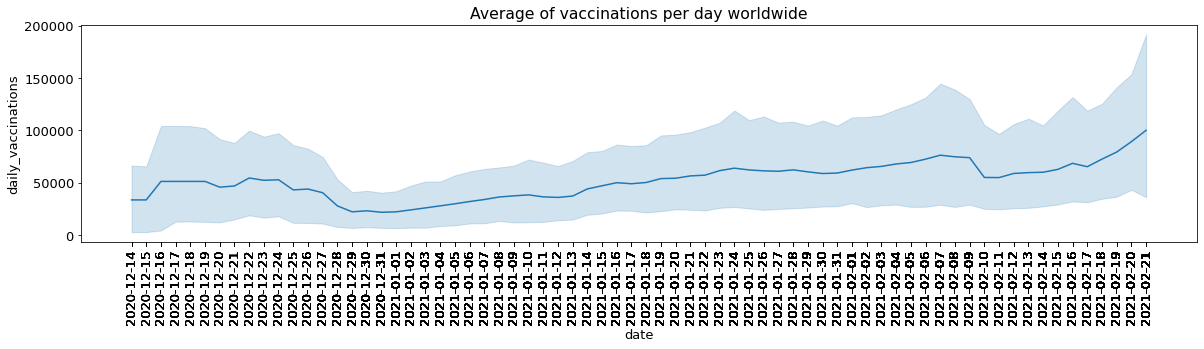

In [179]:
covidallclear.groupby(['country'])
fig_dims = (20, 4)
fig, ax = plt.subplots(figsize=fig_dims)
plt.rcParams.update({'font.size': 13})
sns.lineplot(data=covidallclear, x="date", y='daily_vaccinations')
ax.set(xticks=covidallclear.date.values)
plt.xticks(rotation=90)
plt.title('Average of vaccinations per day worldwide')

In [180]:
covidallclear.sort_values(by=['Week'], inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Average of Daily Vaccinations by week worldwide')

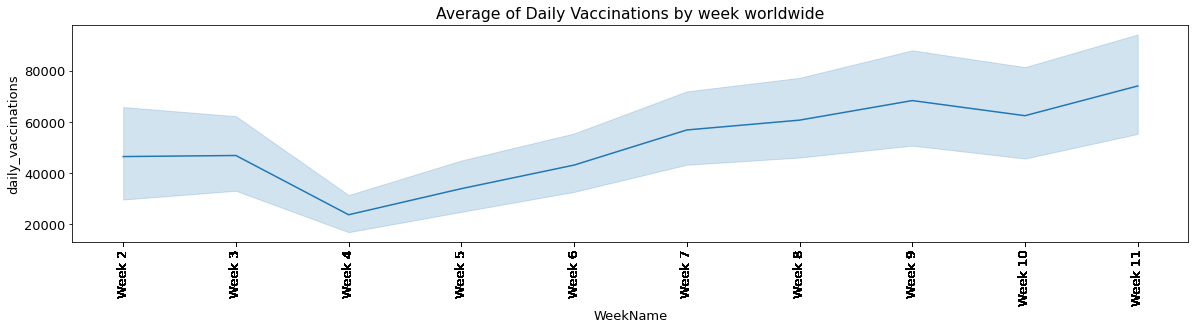

In [181]:
covidallclear.groupby(['country'])
fig_dims = (20, 4)
fig, ax = plt.subplots(figsize=fig_dims)
plt.rcParams.update({'font.size': 13})
sns.lineplot(data=covidallclear, x="WeekName", y='daily_vaccinations')
ax.set(xticks=covidallclear.WeekName.values)
plt.xticks(rotation=90)
plt.title('Average of Daily Vaccinations by week worldwide')

In [182]:
covidallclear.sort_values(by=['Month'], inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Average of Daily Vaccinations by month worldwide')

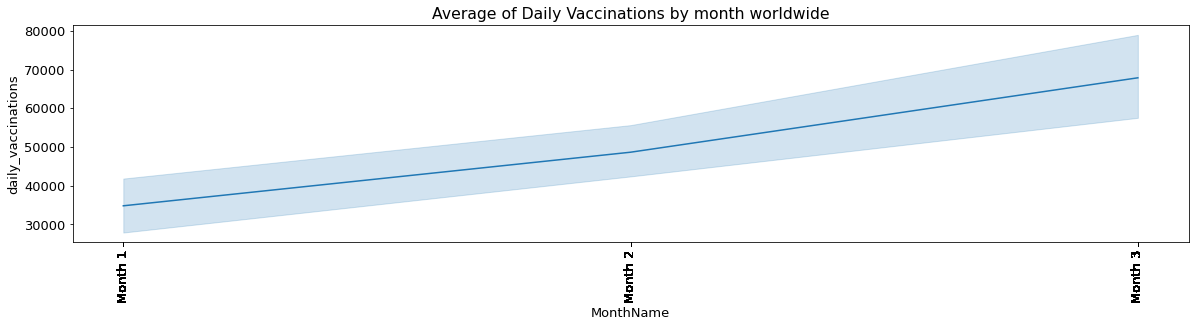

In [183]:
covidallclear.groupby(['country'])
fig_dims = (20, 4)
fig, ax = plt.subplots(figsize=fig_dims)
plt.rcParams.update({'font.size': 13})
sns.lineplot(data=covidallclear, x="MonthName", y='daily_vaccinations')
ax.set(xticks=covidallclear.MonthName.values)
plt.xticks(rotation=90)
plt.title('Average of Daily Vaccinations by month worldwide')

**Plotting total vaccinations per country**

Text(0.5, 1.0, 'Worldwide daily vaccinations')

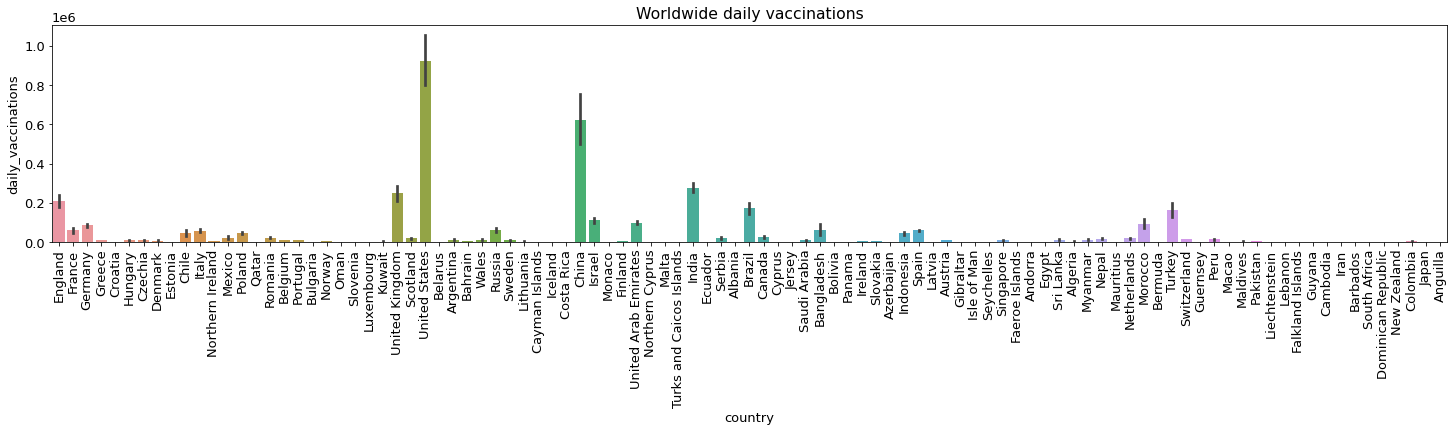

In [184]:
fig_dims = (25, 4)
fig, ax = plt.subplots(figsize=fig_dims)
plt.rcParams.update({'font.size': 13})
plt.xticks(rotation=90)
sns.barplot(data=covidallclear, x="country", y="daily_vaccinations")
plt.title('Worldwide daily vaccinations')

Total population of France in 2021: 65,426,179

Total population of Spain in 2021: 46,745,216

Total population of Canada in 2021: 38,067,903

*Highest average amount of daily vaccinations in a month per country (based on chart named Average of Daily Vaccinations by Month for 3 individual countries):*

France: ~100,000

Spain: ~60,000

Canada: ~35,000

**Assuming that each of the three countries vaccinates (per month) at the capacity equal with the highest *average daily amount* in a month they have so far, with no unforeseen changes in variables, the number of days to vaccinate the entire populations of each of the 3 countries will be:**

France: 65,426,179 / 100,000 = Approx 654 days

Spain: 46,745,216 / 60,000 = Approx 778 days

Canada: 38,067,903 / 35,000 = Approx 1087 days

**Please note that these are probably worst case scenarios, as this data only represents the very beginning of the vaccine's availability. Over time, production and availability of vaccines are most likely to increase, resulting in a more-than-likely higher number of daily vaccinations on average.**

# Time Series for Canada based on this data

In [185]:
covidcanada = covidall.loc[(covidall.country == 'Canada')]

In [186]:
df = covidcanada[['daily_vaccinations', 'date']].copy()

In [187]:
df['date'] = pd.to_datetime(df['date'])

In [188]:
df = df.dropna(how='any')

In [189]:
df.head()

,daily_vaccinations,date
579,4282.0,2021-01-13
580,7285.0,2021-01-14
581,10736.0,2021-01-15
582,14575.0,2021-01-16
583,18415.0,2021-01-17


In [190]:
df['day'] = range(0,len(df.index.values))

In [191]:
df.head()

,daily_vaccinations,date,day
579,4282.0,2021-01-13,0
580,7285.0,2021-01-14,1
581,10736.0,2021-01-15,2
582,14575.0,2021-01-16,3
583,18415.0,2021-01-17,4


Plotting the Original Data

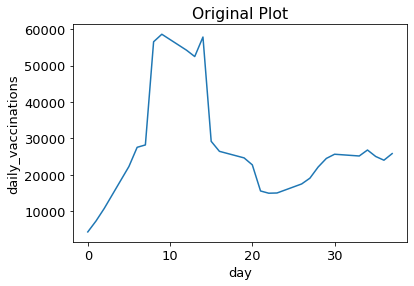

In [192]:
fig = plt.figure(1)
axl = fig.add_subplot(111)
axl.set_xlabel('day')
axl.set_ylabel('daily_vaccinations')
axl.set_title('Original Plot')
axl.plot('day', 'daily_vaccinations', data = df)

In [193]:
df = df.reset_index()
df

,index,daily_vaccinations,date,day
0,579,4282.0,2021-01-13,0
1,580,7285.0,2021-01-14,1
2,581,10736.0,2021-01-15,2
3,582,14575.0,2021-01-16,3
4,583,18415.0,2021-01-17,4
5,584,22255.0,2021-01-18,5
6,585,27529.0,2021-01-19,6
7,586,28179.0,2021-01-20,7
8,587,56525.0,2021-01-21,8
9,588,58593.0,2021-01-22,9


**Plotting Original Data vs Rolling Mean Plot**

Create the Rolling Mean column

In [194]:
df['rollingmean'] = df['daily_vaccinations'].rolling(window = 3).mean()

In [195]:
df.head()

,index,daily_vaccinations,date,day,rollingmean
0,579,4282.0,2021-01-13,0,NaN
1,580,7285.0,2021-01-14,1,NaN
2,581,10736.0,2021-01-15,2,7434.333333
3,582,14575.0,2021-01-16,3,10865.333333
4,583,18415.0,2021-01-17,4,14575.333333


Text(0.5, 1.0, 'Smoothed (Rolling Mean)')

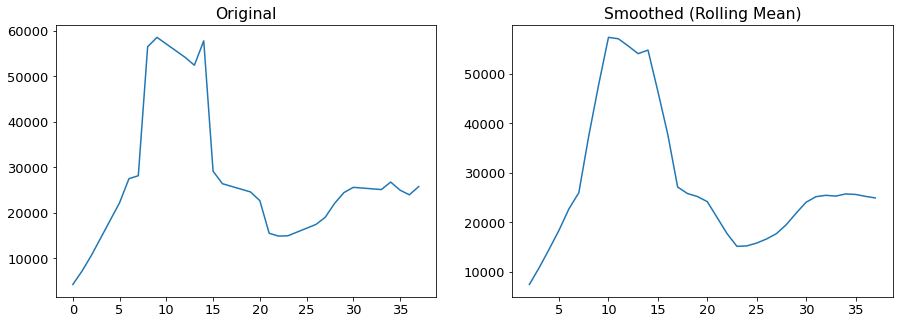

In [196]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
axes[0].plot('day', 'daily_vaccinations', data = df)
axes[0].set_title('Original')
axes[1].plot('day', 'rollingmean', data = df)
axes[1].set_title('Smoothed (Rolling Mean)')

**Combining the two plots on the same plot**

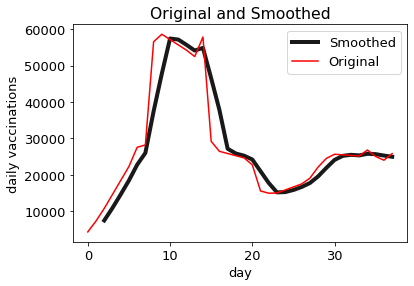

In [197]:
fig = plt.figure();
ax = fig.add_subplot(111)
ax.plot(df['day'], df['rollingmean'], color = (0,0,0), linewidth = 4, alpha = .9, label = 'Smoothed')
ax.plot(df['day'], df['daily_vaccinations'], color = (1,0,0), label = 'Original')
ax.set_title('Original and Smoothed')
ax.set_xlabel('day')
ax.set_ylabel('daily vaccinations')
ax.legend(loc='upper right')

## Choosing a subset of days and plotting linear regression

**Let's select day 22 to 37 of the dataset and make a prediction using linear regression**

In [198]:
filt_df = df[(df['day'] >= 22) & (df['day'] <= 37)]

In [199]:
filt_df

,index,daily_vaccinations,date,day,rollingmean
22,601,14915.0,2021-02-04,22,17717.000000
23,602,14976.0,2021-02-05,23,15140.666667
24,603,15805.0,2021-02-06,24,15232.000000
25,604,16634.0,2021-02-07,25,15805.000000
26,605,17463.0,2021-02-08,26,16634.000000
27,606,19046.0,2021-02-09,27,17714.333333
28,607,22105.0,2021-02-10,28,19538.000000
29,608,24474.0,2021-02-11,29,21875.000000
30,609,25624.0,2021-02-12,30,24067.666667
31,610,25464.0,2021-02-13,31,25187.333333


Now we create Linear Regression

In [200]:
from sklearn.linear_model import LinearRegression

In [201]:
model = LinearRegression().fit(filt_df[['day']], filt_df[['rollingmean']])

In [202]:
prediction = model.predict(filt_df[['day']])

In [203]:
prediction = pd.DataFrame(data = prediction, index = filt_df.index.values, columns = ['predict'])

In [204]:
fulldf = filt_df.join(prediction, how = 'inner')

In [205]:
fulldf

,index,daily_vaccinations,date,day,rollingmean,predict
22,601,14915.0,2021-02-04,22,17717.000000,15126.725490
23,602,14976.0,2021-02-05,23,15140.666667,15953.617647
24,603,15805.0,2021-02-06,24,15232.000000,16780.509804
25,604,16634.0,2021-02-07,25,15805.000000,17607.401961
26,605,17463.0,2021-02-08,26,16634.000000,18434.294118
27,606,19046.0,2021-02-09,27,17714.333333,19261.186275
28,607,22105.0,2021-02-10,28,19538.000000,20088.078431
29,608,24474.0,2021-02-11,29,21875.000000,20914.970588
30,609,25624.0,2021-02-12,30,24067.666667,21741.862745
31,610,25464.0,2021-02-13,31,25187.333333,22568.754902


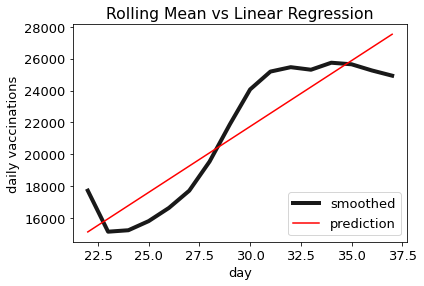

In [206]:
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(fulldf['day'], fulldf['rollingmean'], color = (0,0,0), linewidth = 4, alpha = .9, label = 'smoothed')
ax.plot(fulldf['day'], fulldf['predict'], color = (1,0,0), label = 'prediction')
ax.set_title('Rolling Mean vs Linear Regression')
ax.set_xlabel('day')
ax.set_ylabel('daily vaccinations')
ax.legend(loc='lower right')